In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
churn_data_raw = pd.read_csv('./data/churn.csv')

In [10]:
churn_data = churn_data_raw.copy()

### Understand Data
<p>Understand size and shape of dataset</p>

In [11]:
churn_data.shape

(10000, 14)

In [12]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<AxesSubplot:>

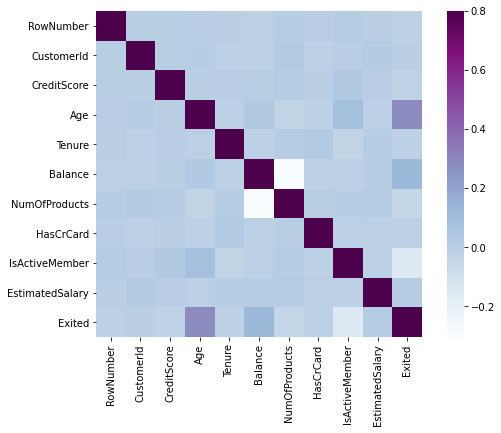

In [18]:
matrix = churn_data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

<AxesSubplot:xlabel='Age', ylabel='Count'>

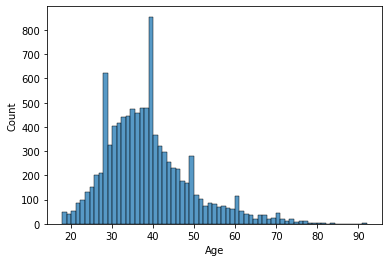

In [21]:
sns.histplot(churn_data['Age'])

<AxesSubplot:xlabel='Age_Bin'>

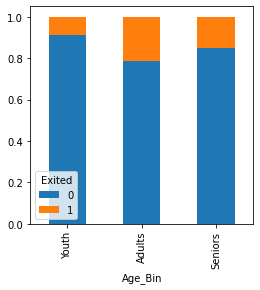

In [28]:
Age = pd.crosstab(churn_data['Age'], churn_data['Exited'])
age_bin = [0,24,64,95]
age_groups = ['Youth','Adults', 'Seniors']
churn_data['Age_Bin'] = pd.cut(churn_data['Age'], age_bin, labels = age_groups)
age_bin = pd.crosstab(churn_data['Age_Bin'], churn_data['Exited'])
age_bin.div(age_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Balance', ylabel='Count'>

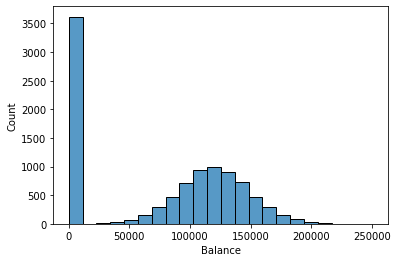

In [29]:
sns.histplot(churn_data['Balance'])

<AxesSubplot:xlabel='Balance_Bin'>

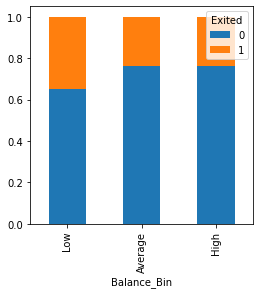

In [30]:
Balance = pd.crosstab(churn_data['Balance'], churn_data['Exited']) 
balance_bin = [0,50000,125000,250000]
balance_groups = ['Low', 'Average', 'High']
churn_data['Balance_Bin'] = pd.cut(churn_data['Balance'], balance_bin, labels = balance_groups)
balance_bin = pd.crosstab(churn_data['Balance_Bin'], churn_data['Exited'])
balance_bin.div(balance_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

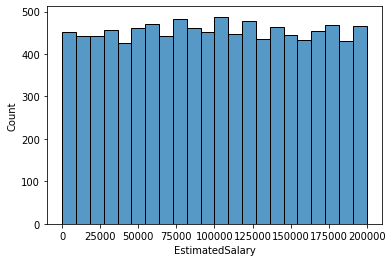

In [31]:
sns.histplot(churn_data['EstimatedSalary'])

<AxesSubplot:xlabel='Salary_Bin'>

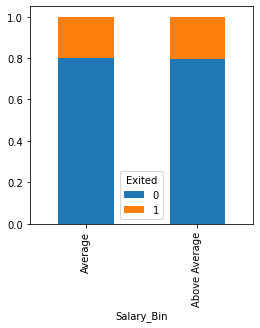

In [33]:
Est_Salary = pd.crosstab(churn_data['EstimatedSalary'], churn_data['Exited']) 
salary_bin = [0,50000,200000]
salary_groups = ['Average', 'Above Average']
churn_data['Salary_Bin'] = pd.cut(churn_data['EstimatedSalary'], salary_bin, labels = salary_groups)
salary_bin = pd.crosstab(churn_data['Salary_Bin'], churn_data['Exited'])
salary_bin.div(salary_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Age_Bin', ylabel='Balance'>

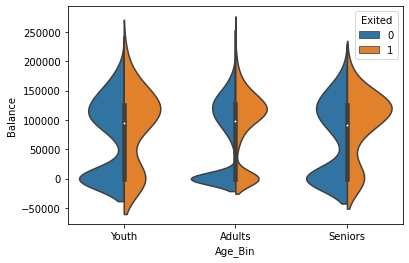

In [37]:
sns.violinplot(x="Age_Bin", y="Balance", hue="Exited", data=churn_data, split=True)

<AxesSubplot:xlabel='Age_Bin', ylabel='EstimatedSalary'>

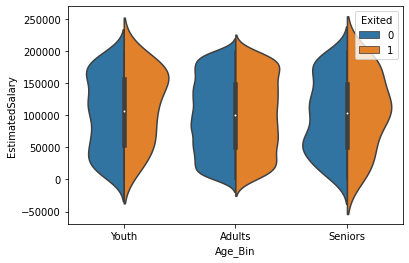

In [38]:
sns.violinplot(x="Age_Bin", y="EstimatedSalary", hue="Exited", data=churn_data, split=True)